In [ ]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML

In [ ]:
student_perform = pd.read_csv('https://github.com/FTDS-learning-materials/phase-0/raw/main/src/StudentsPerformance.csv')
sleep = pd.read_csv('https://github.com/FTDS-learning-materials/phase-0/raw/main/src/sleep_dat.csv')

In [ ]:
display(HTML('<center><b><h3>Student Performance</h3></b></center><br>'))
display(student_perform.head())
print('\n')
display(HTML('<center><b><h3>Sleep Record</h3></b></center><br>'))
display(sleep.head())

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# Confidence Interval

Misalkan kita ingin mengetahui Confidence Interval dari rata-rata Daily Steps.

In [ ]:
confidence_level= 0.95
degress_of_freedom= len(sleep['Daily Steps']) - 1

confidence_interval = stats.t.interval(confidence_level,
                                       degress_of_freedom,
                                       loc=sleep['Daily Steps'].mean(),
                                       scale=stats.sem(sleep['Daily Steps']) #Standard error of the mean (SEM)
                                       )

print(f"95% Confidence Interval for Daily Steps: {confidence_interval}")

95% Confidence Interval for Daily Steps: (np.float64(6652.339714058175), np.float64(6981.350125514018))


**Interpretasi:**

Kita 95% yakin bahwa rata-rata Daily Steps berada dalam rentang 6652 hingga 6981.

# Uji Hipotesis

## One Sample

**Contoh Kasus:**
Joko memiliki asumsi bahwa rata-rata durasi tidur seseorang adalah 8 jam per hari. Kita ingin membuktikan apakah benar asumsi tersebut. Maka kita dapat melakukan uji hipotesis.

Penulisan dalam Pernyataan:

- H0: Rata-rata durasi tidur seseorang adalah 8 jam per hari.
- H1: Rata-rata tidur seseorang tidak sama dengan 8 jam per hari.

Penulisan dalam simbol:
- $H_0: \mu =8$
- $H_1: \mu \neq 8$

Dalam kasus ini, karena kita ingin menguji apakah rata-rata durasi tidur berbeda (tidak sama) dengan 8 jam, kita akan menggunakan **uji One Sample two-tailed**.

In [ ]:
# Atur significance level (alpha)
alpha = 0.05

# Melakukan one-sample t-test (two-tailed)
t_statistic, p_value = stats.ttest_1samp(sleep['Sleep Duration'], 8)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Keputusan
if p_value < alpha:
    print("Tolak H0. Rata-rata durasi tidur berbeda secara signifikan dari 8 jam per hari.")
else:
    print("Gagal menolak H0. Tidak cukup bukti untuk menyatakan bahwa rata-rata durasi tidur adalah sama dengan 8 jam per hari.")

T-statistic: -21.095361561847522
P-value: 1.3829763777878594e-65
Tolak H0. Rata-rata durasi tidur berbeda secara signifikan dari 8 jam per hari.


## Two Sample

**Contoh Kasus**: Terdapat asumsi bahwa skor matematika antara siswa group A dan group B adalah sama.

- H0 (Hipotesis Nol): Tidak ada perbedaan signifikan antara rata-rata skor matematika siswa group A dan group B.
- H1 (Hipotesis Alternatif): Ada perbedaan signifikan antara rata-rata skor matematika siswa group A dan group B.



Penulisan dalam simbol matematika:
- H0: μ1 = μ2  
- H1: μ1 ≠ μ2

Keterangan:
- μ1 = rata-rata skor matematika siswa group A
- μ2 = rata-rata skor matematika siswa group B

In [ ]:
# Pisahkan data menjadi dua kelompok (misalnya, berdasarkan gender)
group_A = student_perform[student_perform['gender'] == 'female']['math score']
group_B = student_perform[student_perform['gender'] == 'male']['math score']

# Atur significance level (alpha)
alpha = 0.05

# Melakukan two-sample t-test (two-tailed)
t_statistic, p_value = stats.ttest_ind(group_A, group_B)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Keputusan
if p_value < alpha:
    print("Tolak H0. Ada perbedaan signifikan antara rata-rata skor matematika siswa group A dan group B.")
else:
    print("Gagal menolak H0. Tidak cukup bukti untuk menyatakan bahwa ada perbedaan signifikan antara rata-rata skor matematika siswa group A dan group B.")

T-statistic: -5.383245869828983
P-value: 9.120185549328822e-08
Tolak H0. Ada perbedaan signifikan antara rata-rata skor matematika siswa group A dan group B.


## ANOVA

**Contoh Kasus**:

Seorang pengajar ingin mengetahui apakah metode pengajaran yang berbeda, mempengaruhi hasil ujian siswa. Diketahui terdapat 3 metode:
- Metode A: Pengajaran tradisional
- Metode B: Pengajaran berbasis proyek
- Metode C: Pengajaran berbasis teknologi

Berikut adalah informasi nilai ujia siswa yang diajarkan dengan 3 metode tersebut:
- Motode A: 70, 75, 80,70,75
- Motode B: 85,85, 70,80,90
- Motode C: 75, 80, 72,75,74


Penulisan dalam Pernyataan:

- H0: Rata-rata nilai ujian dari semua metode pengajaran adalah sama.
- H1: Rata-rata nilai ujian dari semua metode pengajaran adalah tidak sama (berbeda).

In [ ]:
data= {
    'Motode A': [70, 75, 80,68,72],
    'Motode B': [85,90, 90,82,86],
    'Motode C': [78, 82, 79,80,74]
}

df= pd.DataFrame(data)
df.head()

,Motode A,Motode B,Motode C
0,70,85,78
1,75,90,82
2,80,90,79
3,68,82,80
4,72,86,74


In [ ]:
# Melakukan uji hipotesis dengan One-Way ANOVA
f_statistic, p_value = stats.f_oneway(df['Motode A'], df['Motode B'], df['Motode C'])

# hasil
print(f'f-statistic:{f_statistic:.2f}')
print(f'p-value:{p_value:.2f}')

# tingkat signifikansi
alpha= 0.05

if p_value < alpha:
  print('Tolak H0. Ada perbedaan yang signifikan antara metode pengajaran (rata-rata nilai tidak sama pada setiap metode pengajaran)')
else:
  print('Terima H0 (tidak ada cukup bukti untuk menolak hipotesis nol). Rata-rata nilai ujian dari semua metode pengajaran sama')

f-statistic:16.45
p-value:0.00
Tolak H0. Ada perbedaan yang signifikan antara metode pengajaran (rata-rata nilai tidak sama pada setiap metode pengajaran)


## Chi-Squared

**Contoh Kasus**: Kita ingin mengetahui apakah ada hubungan antara jenis kelamin dan pilihan jurusan (IPA atau IPS) pada siswa.

In [ ]:
# Data (Contoh)
data = {
    'Jenis Kelamin': ['Laki-laki', 'Laki-laki', 'Perempuan', 'Perempuan', 'Laki-laki', 'Perempuan', 'Laki-laki', 'Perempuan'],
    'Jurusan': ['IPA', 'IPS', 'IPA', 'IPS', 'IPA', 'IPA', 'IPS', 'IPS']
}
df = pd.DataFrame(data)

# Membuat tabel kontingensi
contingency_table = pd.crosstab(df['Jenis Kelamin'], df['Jurusan'])
print("Tabel Kontingensi:\n", contingency_table)

Tabel Kontingensi:
 Jurusan        IPA  IPS
Jenis Kelamin          
Laki-laki        2    2
Perempuan        2    2


In [ ]:
# Melakukan Chi-Squared Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Menampilkan hasil
print("\nHasil Chi-Squared Test:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p:.3f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:\n", expected)

# Interpretasi hasil
alpha = 0.05  # Tingkat signifikansi
if p < alpha:
    print("\nKesimpulan: Terdapat hubungan yang signifikan antara jenis kelamin dan pilihan jurusan.")
else:
    print("\nKesimpulan: Tidak terdapat hubungan yang signifikan antara jenis kelamin dan pilihan jurusan.")


Hasil Chi-Squared Test:
Chi-square statistic: 0.00
P-value: 1.000
Degrees of freedom: 1
Expected frequencies:
 [[2. 2.]
 [2. 2.]]

Kesimpulan: Tidak terdapat hubungan yang signifikan antara jenis kelamin dan pilihan jurusan.


# Correlation Analysis

## Scipy

In [ ]:
sleep.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Misalkan pada bagian ini kita akan mencoba melihat hubungan antara **Sleep Duration** dan **Heart Rate**.

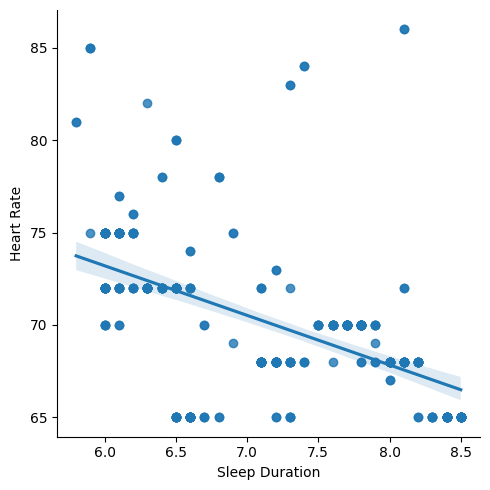

In [ ]:
sns.lmplot(data=sleep,x='Sleep Duration', y='Heart Rate')

In [ ]:
corr_r, pval_p = stats.pearsonr(sleep['Sleep Duration'], sleep['Heart Rate'])
corr_rho, pval_s = stats.spearmanr(sleep['Sleep Duration'], sleep['Heart Rate'])
corr_tau, pval_k = stats.kendalltau(sleep['Sleep Duration'], sleep['Heart Rate'])

print(f"r-correlation: {corr_r:.2f}, p-value: {pval_p}")
print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")
print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

r-correlation: -0.52, p-value: 6.914740131849277e-27
rho-correlation: -0.61, p-value: 2.5508723014277034e-39
tau-correlation: -0.46, p-value: 3.28670670665191e-33


`p-value` digunakan untuk memberikan informasi apakah korelasi itu real atau hanya kebetulan (tidak signifikan). **Jika p-value lebih besar dari 0,05, maka korelasi antara dua variabel dianggap terjadi karena kebetulan**.

Dalam kasus kami, korelasi antara `Sleep Duration` dan `Heart Rate` adalah real, dan berdasarkan korelasi Pearson dan Spearman, kedua variabel tersebut menunjukkan korelasi yang sedang.

## Pandas

In [ ]:
print(f"r-correlation: {sleep['Sleep Duration'].corr(sleep['Heart Rate']):.2f}")
print(f"rho-correlation: {sleep['Sleep Duration'].corr(sleep['Heart Rate'], method='spearman'):.2f}")
print(f"tau-correlation: {sleep['Sleep Duration'].corr(sleep['Heart Rate'], method='kendall'):.2f}")

r-correlation: -0.52
rho-correlation: -0.61
tau-correlation: -0.46
